<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/Visualization_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import json

url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, "data.json")
sns.set(color_codes=True)

#Plotting composition of Data
-> Static composition (Single snapshot)
-> Dynamic compostion

Pie Chart

([<matplotlib.patches.Wedge at 0x7f29cae80b10>,
 [Text(0.19980052901159365, 1.0817022458175296, 'Adelie'),
  Text(-2.0317157487857, -0.5311601605317957, 'Chinstrap'),
  Text(0.4669023904498147, -0.9959930510762859, 'Gentoo')],
 [Text(0.10898210673359653, 0.5900194068095616, '44.19%'),
  Text(-1.5479739038367235, -0.40469345564327297, '19.77%'),
  Text(0.2546740311544443, -0.5432689369507013, '36.05%')])

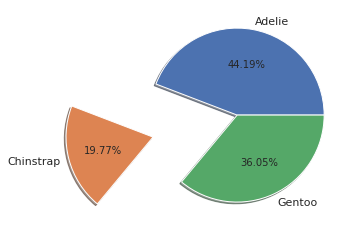

In [ ]:
penguin = sns.load_dataset("penguins")
rec = penguin.groupby("species")["species"].count()
plt.pie(rec, labels=rec.index, autopct="%.2f%%", explode=[0, 1, 0], shadow=True)

##Donut chart
Pie chart is difficult to visualize. Hence we can use this as value is proprtional to length and not the area.



([<matplotlib.patches.Wedge at 0x7f29c9160850>,
 [Text(0.7086665600368222, 0.30115063786347374, ''),
  Text(0.5344371254920076, 0.5543256794483187, ''),
  Text(-0.2750677757511998, 0.719192407317602, ''),
  Text(-0.697195151053494, -0.3268316406768105, ''),
  Text(-1.414467053015193e-16, -0.77, ''),
  Text(0.4480313745243962, -0.6262330935376861, ''),
  Text(0.6847934573226385, -0.35207658372591005, ''),
  Text(0.77, -1.885956070686924e-16, ''),
  Text(0.77, -1.885956070686924e-16, '')])

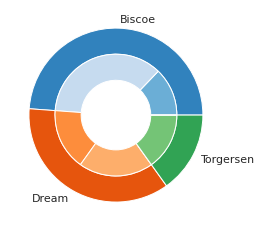

In [ ]:
#plt.pie(rec, wedgeprops=dict(width=0.3)) #For using different color, use colormap documentation
c = pd.crosstab(penguin.species, penguin.island)
c = c.T
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([0, 4, 8]))
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))
plt.pie(c.sum(axis=1), labels=c.index,  wedgeprops=dict(width=0.3), radius=1, colors=outer_colors)
plt.pie(c.values.flatten(), wedgeprops=dict(width=0.3), radius=0.7, colors=inner_colors)


#Stacked Bar Plot

In [ ]:
with open("data.json") as f:
    data = json.load(f)
data = data["states_daily"]
covid_data = pd.json_normalize(data)
covid_monthly_data = covid_data.iloc[-90:]
#plt.xticks(rotation=90)
covid_monthly_data.date = pd.to_datetime(covid_monthly_data.date)
# covid_monthly_data.set_index("date", inplace=True)
covid_monthly_data.drop("dateymd", axis=1, inplace=True)
covid_monthly_data.drop("date", axis=1, inplace=True)
covid_monthly_data.drop("tt", axis=1, inplace=True)
covid_monthly_data.set_index("status", inplace=True)
df = covid_monthly_data.T
data = df.apply(pd.to_numeric)
totalConfirmed = data["Confirmed"].sum(axis=1)
totalRecovered = data["Recovered"].sum(axis=1)
totalDeceased = data["Deceased"].sum(axis=1)
data["totalConfirmed"] = totalConfirmed
data["totalRecovered"] = totalRecovered
data["totalDeceased"] = totalDeceased

# plt.bar(data.index, data["totalDeceased"])
# plt.bar(data.index, data["totalConfirmed"], bottom=data["totalDeceased"])
# for i, v in enumerate(data.index):
#     x = i
#     y = data.iloc[i]["totalConfirmed"] + 100
#     plt.text(x, y, str(y), ha="center" )


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##Relative stacked Bar Plot


In [ ]:
df = pd.DataFrame({'totalConfimed': totalConfirmed, 'totalRecovered': totalRecovered, 'totalDeceased': totalDeceased}, index=data.index)
df["total"] = df.sum(axis=1)
df["fractionConfirmed"] = df["totalConfimed"] / df["total"]
df["fractionRecovered"] = df["totalRecovered"] / df["total"]
df["fractionDeceased"] = df["totalDeceased"] / df["total"]
df.dropna(inplace=True)
plt.bar(df.index, df["fractionConfirmed"])
plt.bar(df.index, df["fractionRecovered"], bottom=df["fractionConfirmed"])
plt.bar(df.index, df["fractionDeceased"], bottom=df["fractionConfirmed"] + df["fractionRecovered"])
plt.xticks(rotation=90)

##Time varying data

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

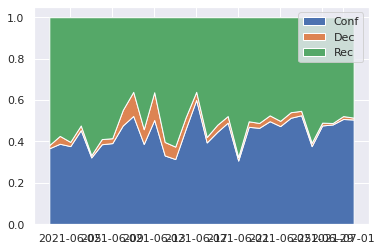

In [ ]:
with open("data.json") as f:
    data = json.load(f)
data = data["states_daily"]
covid_data = pd.json_normalize(data)
covid_monthly_data = covid_data.iloc[-90:]
#plt.xticks(rotation=90)
covid_monthly_data.date = pd.to_datetime(covid_monthly_data.date)
# covid_monthly_data.set_index("date", inplace=True)
covid_monthly_data.drop("dateymd", axis=1, inplace=True)
# covid_monthly_data.set_index("date", inplace=True)
mh_data = covid_monthly_data[["mh", "status", "date"]]
mh_data["mh"] = mh_data["mh"].apply(pd.to_numeric)
df = mh_data.pivot_table(values="mh", columns="status", index="date")
# plt.stackplot(df.index, df.Confirmed, df.Deceased, df.Recovered, labels=["Conf", "Dec", "Rec"])
# plt.legend()
#Relative
plt.stackplot(df.index, df.Confirmed/df.sum(axis=1), df.Deceased/df.sum(axis=1), df.Recovered/df.sum(axis=1), labels=["Conf", "Dec", "Rec"])
plt.legend()

##Scatter Plot

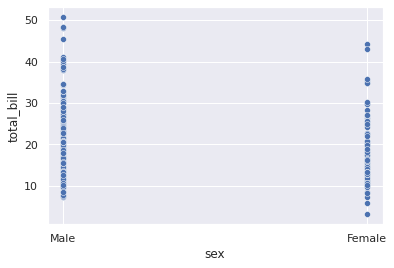

In [ ]:
tips = sns.load_dataset("tips")
tips.head()
sns.scatterplot(x="total_bill", y="tip", data=tips)
#sns.scatterplot(x="total_bill", y="tip", data=tips, hue="sex")
# sns.regplot(x="total_bill", y="tip", data=tips, order=1)
tips["fraction"] = tips["tip"] / tips["total_bill"]
# sns.regplot(x="total_bill", y="fraction", data=tips, order=1)

##Bar Plot for categorical variable

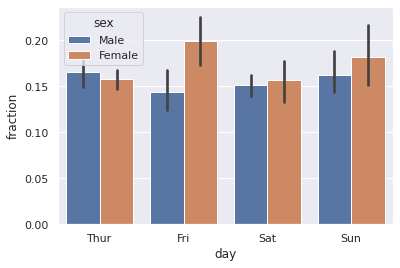

In [ ]:
#sns.barplot(x="day", y="tip", data=tips)
#It shows that people are giving more tips on weekend. One way to find out is to use relative tips
#sns.barplot(x="day", y="fraction", data=tips)
#It shows that hyposthesis is not necessarily correct.
sns.barplot(x="day", y="fraction", data=tips, hue="sex")

#Bar Plot : Continous vs Continous plot where continous variable is cut across bins

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


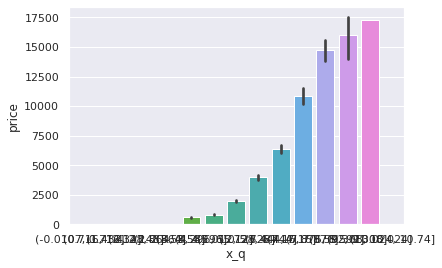

In [ ]:
d = sns.load_dataset("diamonds")
#sns.barplot("x", "price", data=d.sample(1000))
d["x_q"] = pd.cut(d["x"], bins=15)
sns.barplot("x_q", "price", data=d.sample(1000))

##Line Plot

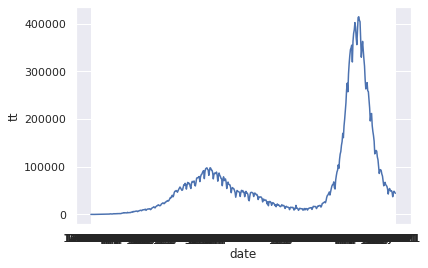

In [ ]:
df = covid_data[covid_data["status"]=="Confirmed"].drop(["dateymd", "status"], axis=1)
df.set_index("date", inplace=True)
res = df.apply(pd.to_numeric)
sns.lineplot(x=res.index, y=res["tt"], data=res)


##Heatmap

In [ ]:
f = sns.load_dataset("flights")
f_=pd.pivot(data=f, index="year", columns="month", values="passengers")
f_.head()
# sns.heatmap(f_)

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
